# Exploratory Data Analysis (EDA) of the Airbus Aircraft Sample Dataset

## Introduction

This notebook explores the [Airbus Aircraft Sample Dataset](https://www.kaggle.com/datasets/airbusgeo/airbus-aircrafts-sample-dataset), a curated collection of satellite images featuring aircraft, available for study and analysis on Kaggle. The focus is on extracting valuable insights and preparing the dataset for further analysis through a series of structured steps. The objective is to comprehend the dataset's intricacies, including the distribution of aircraft sizes and the overall complexity of the images.

## Table of Contents

1. **Setup**
    - Import Libraries
    - Load the Dataset
    - Dataset Overview
2. **Data Cleaning and Preprocessing**
    - Handling Missing Values
    - Parsing Geometry Data
3. **Exploratory Data Analysis**
    - Basic Overview
        - Dataset Shape and Composition
        - Unique Image Analysis
    - Univariate Analysis
        - Class Distribution
        - Bounding Box Widths Analysis
        - Bounding Box Heights Analysis
        - Bounding Box Size Analysis
    - Bivariate Analysis
        - Correlation Between Bounding Box Size and Class
        - Image Complexity
4. **Visual Inspection of Images**
    - Sample Images Display
5. **Saving the Preprocessed DataFrame**
    - Saving to CSV

## 1. Setup

### 1.1. Import Libraries

In [1]:
import os
from pathlib import Path
import opendatasets as od
import pandas as pd
from ast import literal_eval
import cv2
import random
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Load the Dataset

In [2]:
parent_dir = Path(os.path.realpath("")).parent

In [3]:
dataset_dir = parent_dir / "data"
raw_data_dir = dataset_dir / "raw"
processed_data_dir = dataset_dir / "processed"

dataset_dir.mkdir(parents=True, exist_ok=True)
raw_data_dir.mkdir(parents=True, exist_ok=True)
processed_data_dir.mkdir(parents=True, exist_ok=True)

In [4]:
dataset_url = "https://www.kaggle.com/datasets/airbusgeo/airbus-aircrafts-sample-dataset"
od.download(dataset_url, raw_data_dir)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87.6M/87.6M [00:13<00:00, 6.91MB/s]


In [5]:
raw_data_file_path = raw_data_dir / "airbus-aircrafts-sample-dataset"
processed_data_file_path = processed_data_dir / "data.csv"

In [6]:
os.listdir(raw_data_file_path)

['annotations.csv', 'extras', 'images', 'LICENSE.txt', 'README.md']

In [7]:
img_dir = raw_data_file_path / "images"
extras_dir = raw_data_file_path / "extras"
df_dir = raw_data_file_path / "annotations.csv"

In [8]:
img_list = list(img_dir.glob('*.jpg'))
extras_list = list(extras_dir.glob('*.jpg'))

In [9]:
len(img_list)

103

In [10]:
len(extras_list)

6

In [11]:
random_img_path = random.choice(img_list)
img = cv2.imread(str(random_img_path))
height, width, channels = img.shape
print(f"Image Dimensions: {width}x{height}, Channels: {channels}")

Image Dimensions: 2560x2560, Channels: 3


### 1.3. Dataset Overview

In [12]:
df = pd.read_csv(df_dir)

In [13]:
df.head()

id                                  image_id  \
0   1  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   
1   2  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   
2   3  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   
3   4  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   
4   5  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   

                                            geometry     class  
0  [(135, 522), (245, 522), (245, 600), (135, 600...  Airplane  
1  [(1025, 284), (1125, 284), (1125, 384), (1025,...  Airplane  
2  [(1058, 1503), (1130, 1503), (1130, 1568), (10...  Airplane  
3  [(813, 1518), (885, 1518), (885, 1604), (813, ...  Airplane  
4  [(594, 938), (657, 938), (657, 1012), (594, 10...  Airplane

In [14]:
# df.iloc[0]

In [15]:
df["geometry"].iloc[0]

'[(135, 522), (245, 522), (245, 600), (135, 600), (135, 522)]'

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3425 non-null   int64 
 1   image_id  3425 non-null   object
 2   geometry  3425 non-null   object
 3   class     3425 non-null   object
dtypes: int64(1), object(3)
memory usage: 107.2+ KB


In [17]:
# df["class"].unique()

In [18]:
df["class"].value_counts()

class
Airplane              3316
Truncated_airplane     109
Name: count, dtype: int64

## 2. Data Cleaning and Preprocessing

### 2.1. Handling Missing Values

In [19]:
df.isnull().sum()

id          0
image_id    0
geometry    0
class       0
dtype: int64

### 2.2. Parsing Geometry Data

In [20]:
# Convert the 'geometry' string into actual list of tuples
df['geometry'] = df['geometry'].apply(literal_eval)

In [21]:
def parse_geometry(geometry):
    # Convert the list of tuples into separate lists of x and y coordinates
    x_coords, y_coords = zip(*geometry[:-1])
    # Find the minimum and maximum x and y coordinates
    x_min, y_min, x_max, y_max = min(x_coords), min(y_coords), max(x_coords), max(y_coords)
    return x_min, y_min, x_max, y_max

In [22]:
df[['x_min', 'y_min', 'x_max', 'y_max']] = pd.DataFrame(df['geometry'].apply(parse_geometry).tolist(), index=df.index)

## 3. Exploratory Data Analysis

### 3.1. Basic Overview

#### Dataset Shape and Composition

In [23]:
print("Dataset shape:", df.shape)

Dataset shape: (3425, 8)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3425 non-null   int64 
 1   image_id  3425 non-null   object
 2   geometry  3425 non-null   object
 3   class     3425 non-null   object
 4   x_min     3425 non-null   int64 
 5   y_min     3425 non-null   int64 
 6   x_max     3425 non-null   int64 
 7   y_max     3425 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 214.2+ KB


#### Unique Image Analysis

In [25]:
unique_images = df['image_id'].nunique()
print(f"Number of unique images: {unique_images}")

Number of unique images: 103


### 3.2. Univariate Analysis

#### Class Distribution

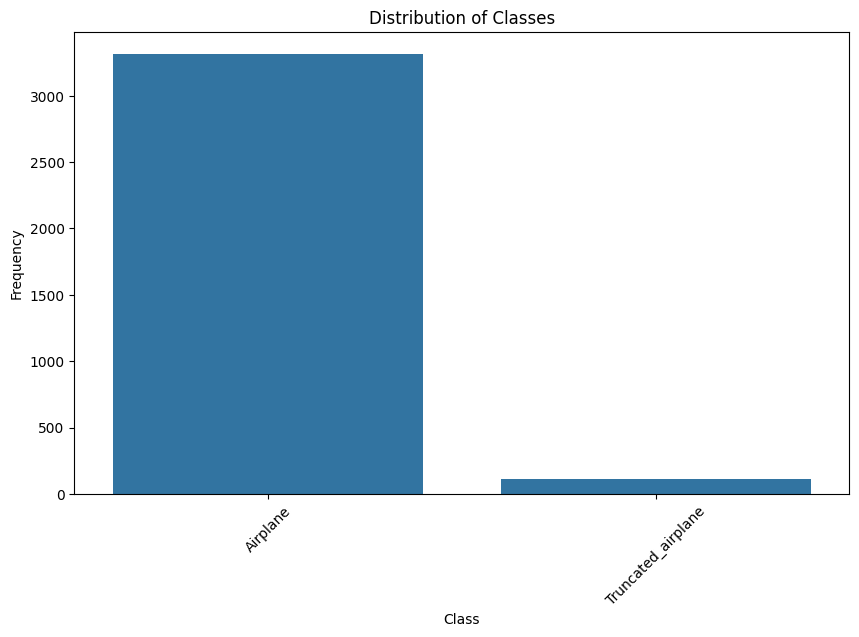

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Bounding Box Widths Analysis

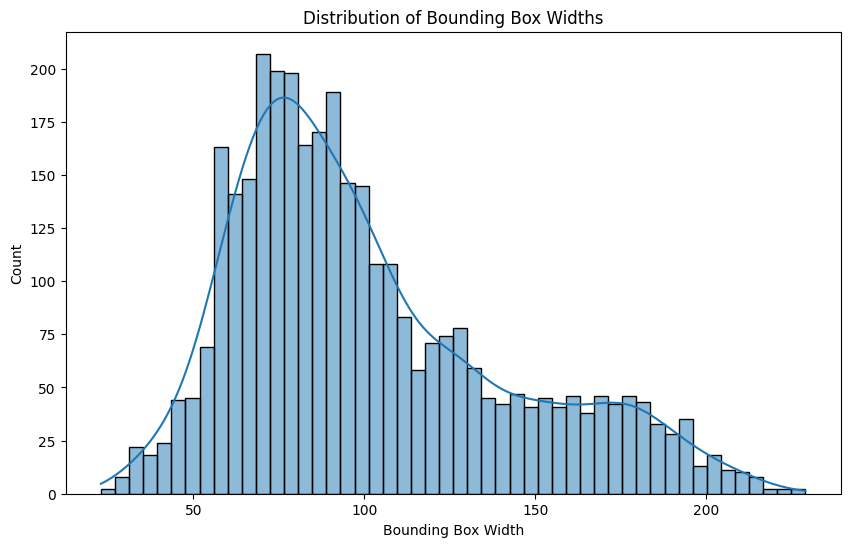

In [27]:
df['bbox_width'] = (df['x_max'] - df['x_min'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bbox_width', bins=50, kde=True)
plt.title('Distribution of Bounding Box Widths')
plt.xlabel('Bounding Box Width')
plt.ylabel('Count')
plt.show()

#### Bounding Box Heights Analysis

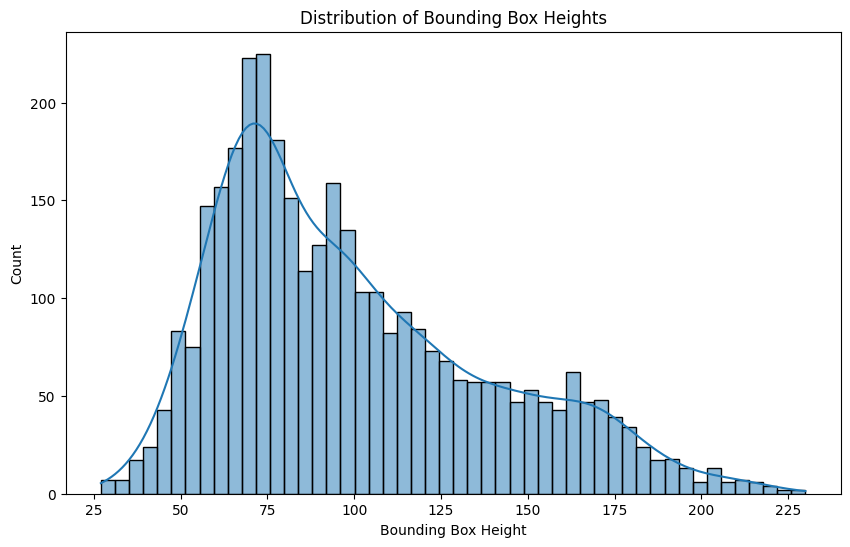

In [28]:
df['bbox_height'] = (df['y_max'] - df['y_min'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bbox_height', bins=50, kde=True)
plt.title('Distribution of Bounding Box Heights')
plt.xlabel('Bounding Box Height')
plt.ylabel('Count')
plt.show()

#### Bounding Box Area Analysis

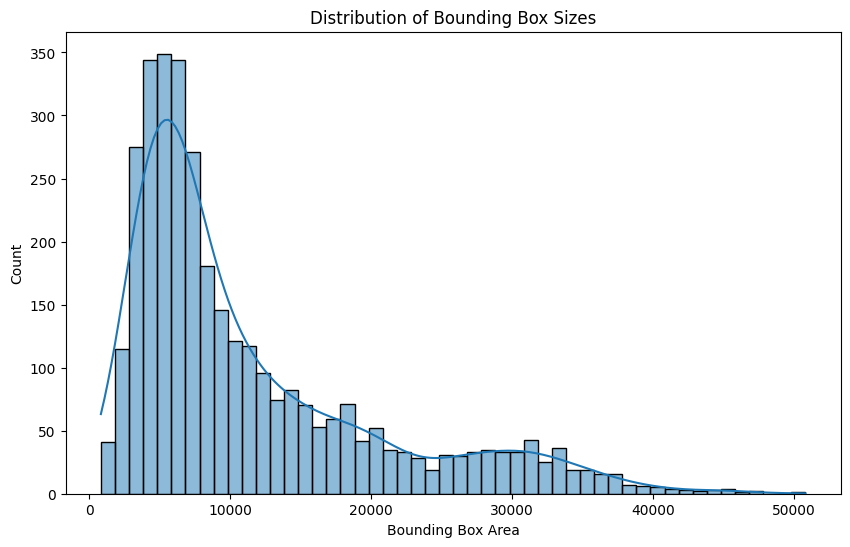

In [29]:
df['bbox_area'] = (df['x_max'] - df['x_min']) * (df['y_max'] - df['y_min'])

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bbox_area', bins=50, kde=True)
plt.title('Distribution of Bounding Box Sizes')
plt.xlabel('Bounding Box Area')
plt.ylabel('Count')
plt.show()

### 3.3. Bivariate Analysis

In [30]:
from sklearn.preprocessing import LabelEncoder

#### Correlation Between Bounding Box Size and Class

               bbox_area  class_encoded
bbox_area       1.000000      -0.070311
class_encoded  -0.070311       1.000000


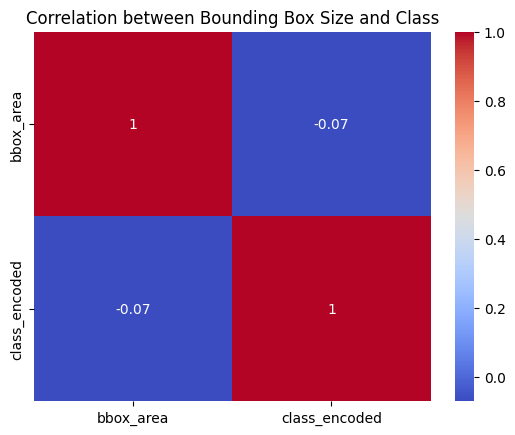

In [31]:
# Encode 'class' column to numeric values
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])

# Calculate correlation
correlation_matrix = df[['bbox_area', 'class_encoded']].corr()
print(correlation_matrix)

# Visualize correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Bounding Box Size and Class')
plt.show()

#### Image Complexity

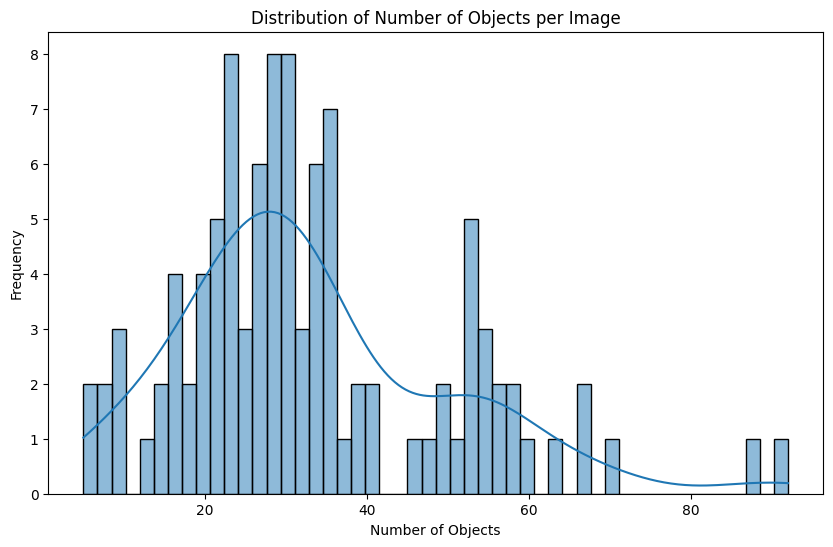

In [32]:
# Calculate the number of objects per image
image_complexity = df.groupby('image_id').size()

plt.figure(figsize=(10, 6))
sns.histplot(image_complexity, bins=50, kde=True)
plt.title('Distribution of Number of Objects per Image')
plt.xlabel('Number of Objects')
plt.ylabel('Frequency')
plt.show()

## 4. Visual Inspection of Images

### Sample Images Display

Selected image: eeb978ec-5945-4def-819a-4ea903b17c2d.jpg


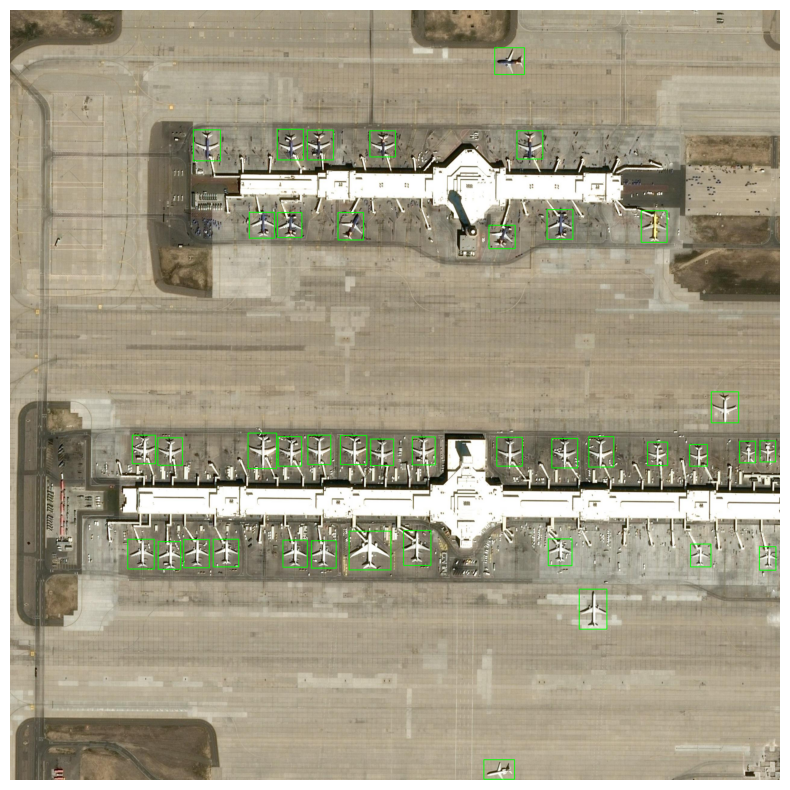

Selected image: fc8f9dc5-b6a2-49f3-9bde-1f8ff382ca5f.jpg


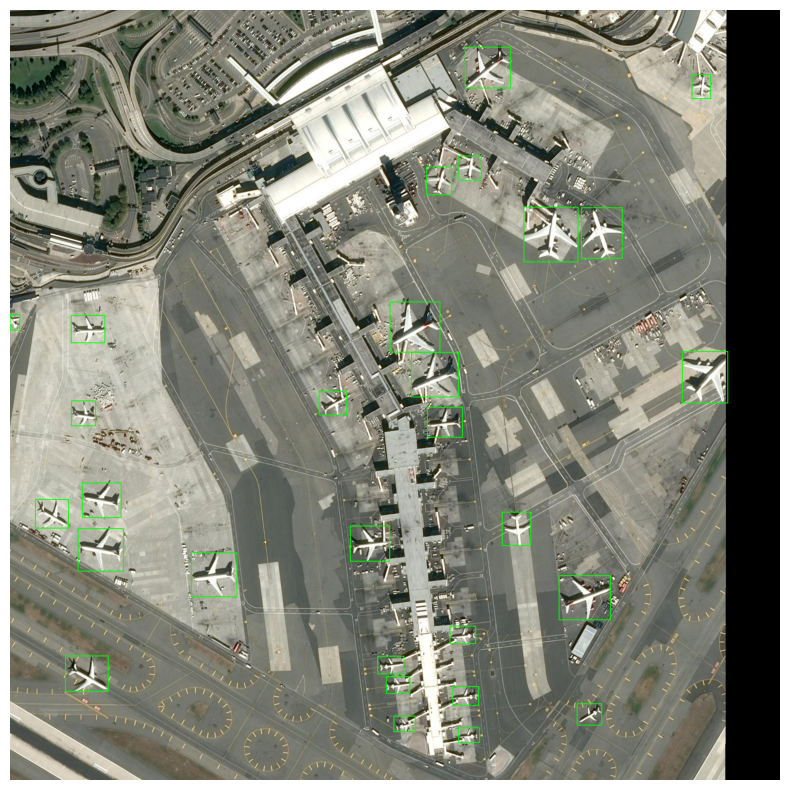

Selected image: c98a544c-4206-4176-b480-35b8bdf5bb14.jpg


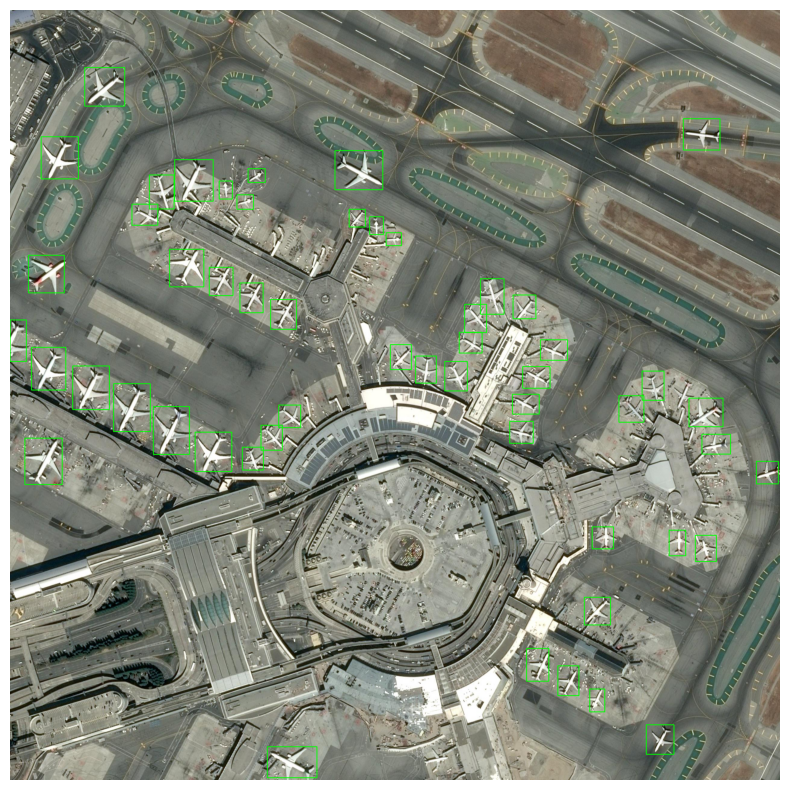

In [33]:
for _ in range(3):
    random_image_id = random.choice(df['image_id'].unique())
    print(f"Selected image: {random_image_id}")
    
    image_annotations = df[df['image_id'] == random_image_id]
    
    image_path = os.path.join(img_dir, random_image_id)
    image = cv2.imread(image_path)
    
    # Iterate over the rows for the selected image and draw each bounding box
    for _, row in image_annotations.iterrows():
        # Parse the geometry
        x_min, y_min, x_max, y_max = row[['x_min', 'y_min', 'x_max', 'y_max']]
        # Draw the bounding box on the image
        # OpenCV expects the top-left corner and bottom-right corner as the rectangle coordinates
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    
    # Convert BGR to RGB for displaying in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

## 5. Saving the Preprocessed DataFrame

### Saving to CSV

In [34]:
df.head()

id                                  image_id  \
0   1  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   
1   2  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   
2   3  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   
3   4  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   
4   5  4f833867-273e-4d73-8bc3-cb2d9ceb54ef.jpg   

                                            geometry     class  x_min  y_min  \
0  [(135, 522), (245, 522), (245, 600), (135, 600...  Airplane    135    522   
1  [(1025, 284), (1125, 284), (1125, 384), (1025,...  Airplane   1025    284   
2  [(1058, 1503), (1130, 1503), (1130, 1568), (10...  Airplane   1058   1503   
3  [(813, 1518), (885, 1518), (885, 1604), (813, ...  Airplane    813   1518   
4  [(594, 938), (657, 938), (657, 1012), (594, 10...  Airplane    594    938   

   x_max  y_max  bbox_width  bbox_height  bbox_area  class_encoded  
0    245    600         110           78       8580              0  
1   1125    384         100          100      10000              0  
2   1130   1568          72           65       4680              0  
3    885   1604          72           86       6192              0  
4    657   1012          63           74       4662              0

In [35]:
df.to_csv(processed_data_file_path, index=False)